# Overview

## What problem is being solved?

Determining the effect that different government types have on their average GDP per capita. While also trying to control the variable of unemployment to focus on the impact of government types rather than percentage unemployed.

## Information source

Dataset including: country names, unemployment rate, gdp per capita, government types, and population. From a [github source](https://github.com/ghenshaw/datasets/blob/master/country_per_cap_gdp_unemployment_gov_type_pop.csv) which was downloaded.

## Why is it interesting to <u>me</u>?

I have always been interested in statistics since I was young, especially country data. I find it fascinating to find small trends in a huge mess of numbers. On top of that, it’s always interesting for to look at government types with an objective lens, since when I look forward towards how I will push for the world to be shaped, it only makes sense to fully consider each option without the processing of one’s own bias.

# Design Choices

## How I used systematic program design?

I tackled the problem not as one large problem, but as many seperate and slightly connected problems with the help of **helper fuctions**. I also planned the entire process out by having the signatures of most functions before any of their bodies were built, so that I don't waste time with what I don't need, and to make sure all my logic of which data types to use would be correct.

## What design choices did I have to make? And Why did I make those choices?

To only include the bar chart and not having a scatterplot showing where the line of best fit is, used in some equations, came from. I chose to leave it out as although it can be interesting to see where the line came from, it could make it confusing to know which chart was the most important and containing the results.

Also, I switch to using a line of best fit to determine expected results and away from comparing countries based on where they ranked in terms of unemployment. I made this switch after I realized that this could lead to some countries, and government types, being artificially boosted in how they perform just based on a lucky ranking placement. 

# Problem Solving

## How did I solve the problem?

I found the expected GDP per capita a country should have based on its unemployment rate. I did this by finding the equation for the line of best fit (had all the countries been placed on a scatter plot, the x values would be unemployment rate, and the y values would be the gdp per capita). Thus by inputting the x (the unemployment of a country) into the y=mx+b equation the result would yield the expected gdp per capita. Then the actual result of the country's gdp per capita could be compared to determine if it is overperforming or underperforming. After the percentage of each government type's countries that were overperforming was found, those percentages could be exported as a bar graph.

### Final chart below:

In [1]:
main('country_per_cap_gdp_unemployment_gov_type_pop.csv')

NameError: name 'main' is not defined

# Most Challenging

The most difficult part of the project was finding the equation of the line of best fit for the data, and then using that equation to interpret the data. This is because this line was essentially being calculated from a graph that was not intended to be visually produced, so the graph and the line's implementation had to be kept on a 'theoretical' level, without the confidence of seeing it for myself.

# Future Work

Using the same systematic design skills I used for this project, I could similarly do studies on other types of country data, and see the effects of one type of country data on the other. This design process works nicely with the attempt to remove unconscious bias and unwanted variables, as the process makes you focus on the outcome of the small picture, rather than on what you want the final outcome to be. For example controlling another variable would just be adding more helper functions rather than redesigning the whole thing. Also, I could continue with the same topic and further remove variables that aren't directly part of government types and GDP per capita, such as how abundant natural resources are; or I could research a completely new correlation.

# Data Definitions

In [2]:
from cs103 import *
from typing import NamedTuple, List, Optional
import csv
from enum import Enum

GovType = Enum ('GovType', ['Republic', 'Constitutional_monarchy', 'Communist_state', 'Absolute_monarchy', 'Na'])
#interp. a government type must be either a Republic ('Republic'), Constitutional monarchy ('Constitutional_monarchy'), 
#Communist state ('Communist_state'), Absolute monarchy ('Absolute_monarchy'), or has no available system of 
#government ('Na') 
#examples are redundant for enumeration


# @typecheck
# def fn_for_gov_type(gt: GovType) -> ...:
#     # template based on one of (5 cases) and atomic distinct (5 times)
#     if gt == GovType.Republic:
#         return ...
#     elif gt == GovType.Constitutional_monarchy:
#         return ...
#     elif gt == GovType.Absolute_monarchy:
#         return ...
#     elif gt == GovType.Communist_state:
#         return ...
#     elif gt == GovType.Na:
#         return ...
    
    

UnemploymentData = NamedTuple ('UnemploymentData', [('unemployment', float), # [0.0 - 100.0]
                                                   ('gdp_per_cap', int), # [0.0 - ...)
                                                   ('gov_type', GovType)])

#interp. data necessary to study unemployment, including the percentage of people unemployed ('unemployment'),
#the gross domestic product per capita ('gdp_per_cap'), and the type of government ('gov_type') (including the case
#of the government type being unlisted)

UD1 = UnemploymentData(19.3, 11305, GovType.Republic)
UD2 = UnemploymentData(11.0, 22968, GovType.Constitutional_monarchy)
UD3 = UnemploymentData(2.7, 70817, GovType.Absolute_monarchy)
UD4 = UnemploymentData(4.1, 14107, GovType.Communist_state)
UD5 = UnemploymentData(13, 14154, GovType.Na)


# @typecheck
# def fn_for_unemployment_data(ud: UnemploymentData) -> ...:
#     #template based on compund and the reference rule
#     return ...(ud.unemployment,
#               ud.gdp_per_cap,
#               fn_for_gov_type(ud.gov_type)) 



# List[UnemploymentData]
# interp. a list of UnemploymentData

LOUD0 = []
LOUD1 = [UD1, UD2, UD3, UD4]
LOUD2 = [UD1, UD2, UD3, UD4, UD5]


# @typecheck
# def fn_for_loud(loud: List[UnemploymentData]) -> ...:  # template based on arbatrary sized
#     # description of the acc                           # and the reference rule 
#     acc = ... # type: ...
#     for ud in loud:
#         acc = ...(acc, fn_for_unemployment_data(ud))
#     return acc

# Read Functions

In [4]:
@typecheck
def read(filename: str) -> List[UnemploymentData]:
    """    
    reads information from the specified file and returns a list of UnemploymentData
    where cases that the GovType is Na are ignored
    """
    
    #return []  #stub
    # Template from HtDAP
    
    # loud contains a list of all UnemplymentData from csv file so far
    loud = [] # type: List[UnemploymentData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            if not is_gov_type_empty(parse_gov_type(row[4])):
                ud = UnemploymentData(parse_float(row[2]), parse_int(row[3]), parse_gov_type(row[4]))
                loud.append(ud)
    
    return loud


@typecheck
def is_gov_type_empty(gt: GovType) -> bool:
    """
    Returns True if a government type unlisted (it is determined unlisted if
    the GovType is Na (Not Available)) and False otherwise
    """
    
    #return True #stub
    #template from GovType
    
    return gt == GovType.Na

@typecheck
def parse_gov_type(gt: str) -> GovType:
    """
    Takes a sting (gt) indicating a type of government and returns the corresponding GovType data 
    (such as 'Republic' becomes GovType.Republic). gt must be either 'Republic', 'Constitutional monarchy',
    'Communist state', 'Absolute monarchy', or 'n/a' (not available)
    """
    
    #return GovType.Republic #stub
    # template based on one of (5 cases) and atomic distinct (5 times)
    
    if gt == 'Republic':
        return GovType.Republic
    elif gt == 'Constitutional monarchy':
        return GovType.Constitutional_monarchy
    elif gt == 'Communist state':
        return GovType.Communist_state
    elif gt == 'Absolute monarchy':
        return GovType.Absolute_monarchy
    elif gt == 'n/a':
        return GovType.Na

    
#Examples and tests for read
start_testing()

#UD(1,2,3, and 4) for testing are from UnemploymentData data definition
expect(read('country_per_cap_gdp_unemployment_gov_type_pop-test1.csv'), [UD1, UD2, UD3, UD4])
expect(read('country_per_cap_gdp_unemployment_gov_type_pop-test2.csv'), [])

summary()


#Examples and tests for is_gov_type_empty
start_testing()
expect(is_gov_type_empty(GovType.Republic), False)
expect(is_gov_type_empty(GovType.Constitutional_monarchy), False)
expect(is_gov_type_empty(GovType.Communist_state), False)
expect(is_gov_type_empty(GovType.Absolute_monarchy), False)
expect(is_gov_type_empty(GovType.Na), True)
summary()


#Examples and tests for parse_gov_type
start_testing()
expect(parse_gov_type('Republic'), GovType.Republic)
expect(parse_gov_type('Constitutional monarchy'), GovType.Constitutional_monarchy)
expect(parse_gov_type('Communist state'), GovType.Communist_state)
expect(parse_gov_type('Absolute monarchy'), GovType.Absolute_monarchy)
expect(parse_gov_type('n/a'), GovType.Na)
summary()

2 of 2 tests passed
5 of 5 tests passed
5 of 5 tests passed


# Analysis Functions

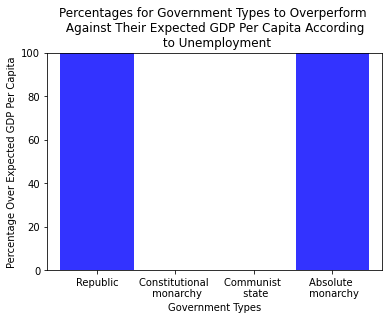

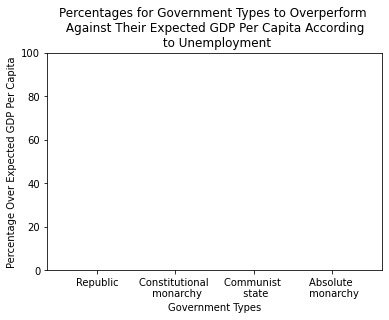

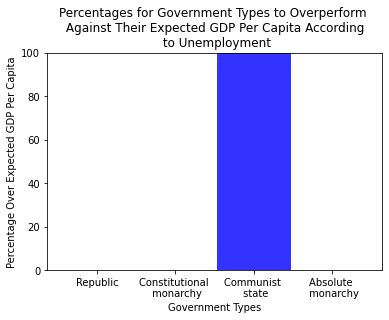

3 of 3 tests passed


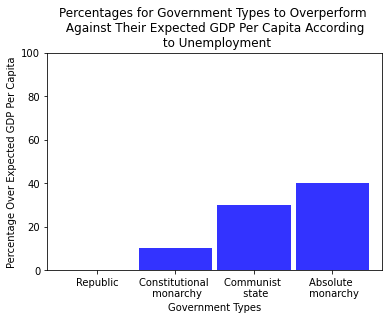

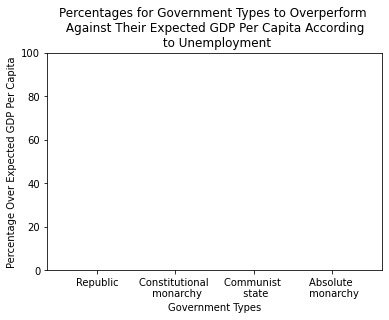

2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed
2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed


In [5]:
import matplotlib.pyplot as plt
@typecheck
def main(filename: str) -> None:
    """
    """
    #return None
    #template based on composition
    
    loud = read(filename)
    Republic_percentage = republic_overperforming_percentage(loud)
    Constitutional_monarchy_percentage = constitutional_monarchy_overperforming_percentage(loud)
    Communist_state_percentage = communist_state_overperforming_percentage(loud)
    Absolute_monarchy_percentage = absolute_monarchy_overperforming_percentage(loud)
    
    display_bar_chart([Republic_percentage, Constitutional_monarchy_percentage, Communist_state_percentage, Absolute_monarchy_percentage])
    


@typecheck
def display_bar_chart(means: List[float]) -> None:
    """
    Display a bar chart indicating the percentage of each government type that overperforms (meaning over
    but not equal to) its expected gdp per capita
    """
    #return None #stub
    #Template based on visualization
    
    assert len(means) == 4
    
    bar_width = 28
    
    middle_of_bars = [5,35,65,95]
    
    opacity = 0.8
    
    # create the first bar chart
    gov_bar = plt.bar(middle_of_bars, 
                      means,
                      bar_width,
                      alpha=opacity,
                      color='b')

    plt.xlabel('Government Types')
    plt.ylabel('Percentage Over Expected GDP Per Capita')
    plt.title('Percentages for Government Types to Overperform \n Against Their Expected GDP Per Capita According \n to Unemployment')
    
    # set the range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([-14,114,0,100])

    
    # set the x-coordinate for positioning the labels. Here, we want each label to be in the middle of each bar
    x_coord_labels = middle_of_bars
    
    # set the labels for each 'tick' on the x-axis
    tick_labels = ['Republic', 'Constitutional \n monarchy', 'Communist \n state', 'Absolute \n monarchy']
    
    plt.xticks(x_coord_labels, tick_labels)
    
    # show the plot
    plt.show()
    
    return

@typecheck
def get_republics(loud: List[UnemploymentData]) -> List[UnemploymentData]:
    """
    Returns all countries that are republics
    """
    #return []
    #template based on List[UnemploymentData]
    
    #countries are the countries found so far to be a republic
    countries = [] #type: List[UnemploymentData]
    
    for ud in loud:
        if is_republic(ud):
            countries.append(ud)
            
    return countries
            
@typecheck
def get_constitutional_monarchies(loud: List[UnemploymentData]) -> List[UnemploymentData]:
    """
    Returns all countries that are constitutional monarchies
    """
    #return []
    #template based on List[UnemploymentData]
    
    #countries are the countries found so far to be a constitutional monarchy
    countries = [] #type: List[UnemploymentData]
    
    for ud in loud:
        if is_constitutional_monarchy(ud):
            countries.append(ud)
            
    return countries
            
@typecheck
def get_communist_states(loud: List[UnemploymentData]) -> List[UnemploymentData]:
    """
    Returns all countries that are communist states
    """
    #return []
    #template based on List[UnemploymentData]
    
    #countries are the countries found so far to be a communist state
    countries = [] #type: List[UnemploymentData]
    for ud in loud:
        if is_communist_state(ud):
            countries.append(ud)
            
    return countries
            
@typecheck
def get_absolute_monarchies(loud: List[UnemploymentData]) -> List[UnemploymentData]:
    """
    Returns all countries that are absolute monarchies
    """
    #return []
    #template based on List[UnemploymentData]
    
    #countries are the countries found so far to be an absolute monarchys
    countries = [] #type: List[UnemploymentData]
    
    for ud in loud:
        if is_absolute_monarchy(ud):
            countries.append(ud)
            
    return countries

@typecheck
def is_republic(ud: UnemploymentData) -> bool:
    """
    Returns True if the country is a republic, and False otherwise
    """
    
    #return True #stub
    #template from UnemploymentData
    
    return ud.gov_type == GovType.Republic

@typecheck
def is_constitutional_monarchy(ud: UnemploymentData) -> bool:
    """
    Returns True if the country is a constitutional monarchy, and False otherwise
    """
    
    #return True #stub
    #template from UnemploymentData
    
    return ud.gov_type == GovType.Constitutional_monarchy

@typecheck
def is_communist_state(ud: UnemploymentData) -> bool:
    """
    Returns True if the country is a communist state, and False otherwise
    """
    
    #return True #stub
    #template from UnemploymentData
    
    return ud.gov_type == GovType.Communist_state

@typecheck
def is_absolute_monarchy(ud: UnemploymentData) -> bool:
    """
    Returns True if the country is an absolute monarchy, and False otherwise
    """
    
    #return True #stub
    #template from UnemploymentData
    
    return ud.gov_type == GovType.Absolute_monarchy

@typecheck
def republic_overperforming_percentage(loud: List[UnemploymentData]) -> float:
    """
    Returns the percentage of republics that overperform against their expected gdp
    """
    #return []
    #template based on List[UnemploymentData]
    
    #counter counts how many countries have overperformed so far
    counter = 0 #type: int
    
    if len(get_republics(loud)) == 0:
        return 0
    else:
        for ud in loud:
            if is_republic(ud):
                if is_overperforming(ud, loud):
                    counter = counter + 1
            
    return percentage(counter, len(get_republics(loud)))

@typecheck
def constitutional_monarchy_overperforming_percentage(loud: List[UnemploymentData]) -> float:
    """
    Returns the percentage of constitutional monarchies that overperform against their expected gdp
    """
    #return []
    #template based on List[UnemploymentData]
    
    #counter counts how many countries have overperformed so far
    counter = 0 #type: int
    
    if len(get_constitutional_monarchies(loud)) == 0:
        return 0
    else:
        for ud in loud:
            if is_constitutional_monarchy(ud):
                if is_overperforming(ud, loud):
                    counter = counter + 1
            
    return percentage(counter, len(get_constitutional_monarchies(loud)))

@typecheck
def communist_state_overperforming_percentage(loud: List[UnemploymentData]) -> float:
    """
    Returns the percentage of comunist states that overperform against their expected gdp
    """
    #return []
    #template based on List[UnemploymentData]
    
    #counter counts how many countries have overperformed so far
    counter = 0 #type: int
    
    if len(get_communist_states(loud)) == 0:
        return 0
    else:
        for ud in loud:
            if is_communist_state(ud):
                if is_overperforming(ud, loud):
                    counter = counter + 1
            
    return percentage(counter, len(get_communist_states(loud)))

#start_testing()
#expect(communist_state_overperforming_percentage(LOUD1, 5), 0)
#summary()

@typecheck
def absolute_monarchy_overperforming_percentage(loud: List[UnemploymentData]) -> float:
    """
    Returns the percentage of absolute monarchies that overperform against their expected gdp
    """
    #return []
    #template based on List[UnemploymentData]
    
    #counter counts how many countries have overperformed so far
    counter = 0 #type: int
    
    if len(get_absolute_monarchies(loud)) == 0:
        return 0
    else:
        for ud in loud:
            if is_absolute_monarchy(ud):
                if is_overperforming(ud, loud):
                    counter = counter + 1
            
    return percentage(counter, len(get_absolute_monarchies(loud)))

    
@typecheck
def is_overperforming(ud: UnemploymentData, loud: List[UnemploymentData]) -> bool:
    """
    Returns True if a country is overperforming its expected gdp, and returns False otherwise.
    (if a country is equal to its expected gdp it's not considered overperforming)
    """
    #return True #stub
    #template based on UnemploymentData ****NEEDS MORE
    return ud.gdp_per_cap > expected_gdp(ud, loud)

#start_testing()
#expect(is_overperforming(UD4, LOUD1), False)
#summary()



@typecheck
def expected_gdp(ud: UnemploymentData, loud: List[UnemploymentData]) -> float:
    """
    Predict and return the expected value of the gdp per capita from the equaltion y = mx + b
    (where gdp per capita is y and unemployment is x)
    """
    #return 0.0
    #template based on UnemploymentData
    
    assert len(loud) != 0
    
    return ud.unemployment * expected_trend(loud) + y_intercept(loud, expected_trend(loud))
    
@typecheck
def get_unemployment_percents(loud: List[UnemploymentData]) -> List[float]:
    """
    Stores and returns all unemployment percents from the list of unemployment data as a list of floats
    """
    #return 0.0
    #template based on List[UnemploymentData]
    
    #total holds all the unemployment percentages found so far
    total = [] #type: List[float]
    
    for ud in loud:
        total.append(ud.unemployment)
        
    return total
        
@typecheck
def get_gdp(loud: List[UnemploymentData]) -> List[float]:
    """
    Stores and returns all gdp per capitas from the list of unemployment data as a list of floats
    """
    #return 0.0
    #template based on List[UnemploymentData]
    
    #total holds all the gdp_per_caps found so far
    total = [] #type: List[float]
    
    for ud in loud:
        total.append(ud.gdp_per_cap)
        
    return total

@typecheck
def percentage(num: float, den: float) -> float:
    """
    Calculates the percentage from a numerator (num) and denominator (den) so that 100% is 
    100 rather than 1.00
    """
    #return 0.0 #stub
    #template based on atomic non-distinct (2 fields)
    return (num/den) * 100

@typecheck
def expected_trend(loud: List[UnemploymentData]) -> float:
    """
    Using the average funtions as intermediate steps, finds the expected trend (or slope) of unemployment (xs)
    and gdp per capita (ys) using the equation, m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)*mean(xs))
    - mean(xs*xs))), to find the slope of the linear regression line.
    """
    #return 0.0
    #template based on *************************
    
    unemployment = get_unemployment_percents(loud)
    gdp = get_gdp(loud)
    
    return (((average(unemployment) * average(gdp)) - average_xy(unemployment, gdp)) / 
    (average(unemployment)**2 - average_squares(unemployment)))

@typecheck
def y_intercept(loud: List[UnemploymentData], slope :float) -> float:
    """
    Finds the y-intercept for the line of best fit, so that the expected gdp per capita can be
    calculated from the rate of unemployment
    """
    #return 0.0
    #template = ...(slope)
    
    unemployment = get_unemployment_percents(loud)
    gdp = get_gdp(loud)
    
    return average(gdp) - slope*average(unemployment)



@typecheck
def average(total: List[float]) -> float:
    """
    Returns the mean, or average, of all the numbers
    """
    #return 0.0 #stub
    #template based on arbitrary sized
    
    #sum is all the floats from the list added up so far
    
    assert len(total) != 0
    
    sum = 0 #type: float
    for n in total:
        sum = sum + n
    
    return sum/len(total)

def average_squares(total: List[float]) -> float:
    """
    Retruns the mean, or average, of all the numbers in the list squared,
    which is a step in finding out the slope for the line of best fit
    """
    #return 0.0 #stub
    #template based on arbitrary sized
    
    #sum is all the floats (squared) from the list added up so far
    
    assert len(total) != 0
    
    sum = 0 #type: float
    for n in total:
        sum = sum + n**2
    
    return sum/len(total)

def average_xy(lox: List[float], loy: List[float]) -> float:
    """
    determines the mean or average for the x's when multiplied with their corresponding y's,
    which is a step in finding out the slope for the line of best fit
    """
    #return 0.0 #stub
    #template based on arbitrary sized
    
    assert len(lox) != 0
    assert len(lox) == len(loy)
    
    #sum is all the x floats (unemployment) times the 
    #y floats (gdp) added up so far
    sum = 0 #type: float
    
    #counter keeps track of which x,y value we are on right now
    counter = 0 #type: int
    
    for x in lox:
        sum = sum + x*loy[counter]
        counter = counter+1
    
    return sum/len(lox)



#tests and examples for main
start_testing()
expect(main('country_per_cap_gdp_unemployment_gov_type_pop-test1.csv'), None)
expect(main('country_per_cap_gdp_unemployment_gov_type_pop-test2.csv'), None)
expect(main('country_per_cap_gdp_unemployment_gov_type_pop-test3.csv'), None)
summary()

#tests and examples for display_bar_chart
start_testing()
expect(display_bar_chart([0,10,30,40]), None)
expect(display_bar_chart([0,0,0,0]), None)
summary()

#tests and examples for get_republics
start_testing()
expect(get_republics(LOUD1), [UD1])
expect(get_republics([UD2, UD3]), [])
summary()

#tests and examples for get_constitutional_monarchies
start_testing()
expect(get_constitutional_monarchies(LOUD1), [UD2])
expect(get_constitutional_monarchies([UD1, UD3]), [])
summary()

#tests and examples for get_communist_states
start_testing()
expect(get_communist_states(LOUD1), [UD4])
expect(get_communist_states([UD1,UD2]), [])
summary()

#tests and examples for get_absolute_monarchies
start_testing()
expect(get_absolute_monarchies(LOUD1), [UD3])
expect(get_absolute_monarchies([UD1,UD2]), [])
summary()

#tests and examples for is_republic
start_testing()
expect(is_republic(UD1), True)
expect(is_republic(UD4), False)
summary()

#tests and examples for is_constitutional_monarchy
start_testing()
expect(is_constitutional_monarchy(UD2), True)
expect(is_constitutional_monarchy(UD1), False)
summary()

#tests and examples for is_communist_state
start_testing()
expect(is_communist_state(UD4), True)
expect(is_communist_state(UD2), False)
summary()

#tests and examples for is_absolute_monarchy
start_testing()
expect(is_absolute_monarchy(UD1), False)
expect(is_absolute_monarchy(UD3), True)
summary()

#tests and examples for republic_overperforming_percentage
start_testing()
expect(republic_overperforming_percentage(LOUD1), 100)
expect(republic_overperforming_percentage([UD1, UnemploymentData(20, 8777717, GovType.Republic)]), 50)
expect(republic_overperforming_percentage([UD3, UD2]), 0)
summary()

#tests and examples for constitutional_monarchy_overperforming_percentage
start_testing()
expect(constitutional_monarchy_overperforming_percentage(LOUD1), 0)
expect(constitutional_monarchy_overperforming_percentage([UD2, UnemploymentData(20, 8777717, GovType.Constitutional_monarchy)]), 50)
expect(constitutional_monarchy_overperforming_percentage([UD1, UD4]), 0)
summary()

#tests and examples for communist_state_overperforming_percentage
start_testing()
expect(communist_state_overperforming_percentage(LOUD1), 0)
expect(communist_state_overperforming_percentage([UD4, UnemploymentData(2, 8777717, GovType.Communist_state)]), 50)
expect(communist_state_overperforming_percentage([UD1, UD3]), 0)
summary()

#tests and examples for absolute_monarchy_overperforming_percentage
start_testing()
expect(absolute_monarchy_overperforming_percentage(LOUD1), 100)
expect(absolute_monarchy_overperforming_percentage([UD3, UnemploymentData(2, 817, GovType.Absolute_monarchy)]), 50)
expect(absolute_monarchy_overperforming_percentage([UD2, UD1]), 0)
summary()

#tests and examples for is_overperforming
start_testing()
expect(is_overperforming(UD1, LOUD1), True)
expect(is_overperforming(UD2, LOUD1), False)
summary()

#tests and examples for expected_gdp
start_testing()
expect(expected_gdp(UD1, LOUD1), 7513.076201455435)
expect(expected_gdp(UD1, [UD1, UnemploymentData(19, 11305, GovType.Republic)]), 11305)
summary()

#tests and examples for get_unemployment_percents
start_testing()
expect(get_unemployment_percents([]), [])
expect(get_unemployment_percents([UD1]), [19.3])
expect(get_unemployment_percents(LOUD1), [19.3, 11.0, 2.7, 4.1])
summary()

#tests and examples for get_gdp
start_testing()
expect(get_gdp([]), [])
expect(get_gdp([UD1]), [11305])
expect(get_gdp(LOUD1), [11305, 22968, 70817, 14107])
summary()

#tests and examples for percentage
start_testing()
expect(percentage(200,100), 200)
expect(percentage(0,55), 0)
summary()

#tests and examples for expected_trend
start_testing()
expect(expected_trend(LOUD1), -2223.0597305281362)
expect(expected_trend([UD1, UD2]), -1405.1807228915668)
summary()

#tests and examples for y_intercept
start_testing()
expect(y_intercept(LOUD1, 1), 29789.975)
expect(y_intercept(LOUD1, 0), 29799.25)
expect(y_intercept(LOUD1, -1), 29808.525)
summary()

#tests and examples for average
start_testing()
expect(average([2]), 2)
expect(average([0,50]), 25)
summary()

#tests and examples for average_squares
start_testing()
expect(average_squares([2]), 4)
expect(average_squares([0,10]), 50)
summary()

#tests and examples for average_xy
start_testing()
expect(average_xy([2,3], [1,1]), 2.5)
expect(average_xy([0,50], [50,0]), 0)
summary()